# Laboratorio 2

## Ejercicio 1

Tres refinerias con capacidades diarias de 6, 5 y 8 millones de galones, respectivamente, abastecen a tres areas de distribucion con demandas diarias de 4, 8 y 7 millones de galones, respectivamente. La gasolina se transporta a las tres areas de distribucion a traves de una red de oleoductos. El costo de transporte es de $0.10 por 1000 galones por kilometro de oleoducto. En la tabla 1 se presenta la distancia en kilometros entre las refinerias y las areas de distribucion. La refineria 1 no esta conectada al area de distribucion 3.

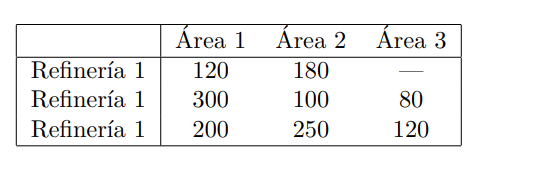

Esto quiere decir que nuestros productores producen un array de produccion llamado S, y nuestra demanda tiene un array de demanda de D .

Pero aqui hay una cosa, es que la tabla es por distancias no por galones entonces nuestra formula de final de sumatorias tiene que contemplar eso.


Una cosa es como que la 1 no esta conectada a la 3 ponemos como costo enorme asi nunca tomara esa ruta. 

Luego para determinar el costo necesitamos hacer la conversion

$$costogalonkm =  \frac{0.10}{1000}$$

Entonces el costo seria

$$costo_{ij} =  distancia_{ij} * costogalonkm$$

In [ ]:
using JuMP
using Ipopt 
using HiGHS 
using Optimization

model = Model()

supply = [5000000, 6000000, 8000000]
demand = [4000000,8000000,7000000]

distancias = [ 120   180  1e27; 
               300 100  80; 
          200  250  120; ]

costos = distancias .* 0.0001


# variables 
@variable(model, x[1:3, 1:3] >= 0)


# constraints 
@constraint(model, sum(x[1,j] for j in 1:3) == supply[1])
@constraint(model, sum(x[2,j] for j in 1:3) == supply[2])
@constraint(model, sum(x[3,j] for j in 1:3) == supply[3])

@constraint(model, sum(x[i,1] for i in 1:3) == demand[1])
@constraint(model, sum(x[i,2] for i in 1:3) == demand[2])
@constraint(model, sum(x[i,3] for i in 1:3) == demand[3])


# @objective(model, Min, sum((distancias[i,j]*0.10) * (x[i,j]/1000) for i in 1:3, j in 1:3))

@objective(model, Min, sum(costos[i,j] * x[i,j] for i in 1:3, j in 1:3))

0.012 x[1,1] + 0.018000000000000002 x[1,2] + 1.0000000000000001e23 x[1,3] + 0.030000000000000002 x[2,1] + 0.01 x[2,2] + 0.008 x[2,3] + 0.02 x[3,1] + 0.025 x[3,2] + 0.012 x[3,3]

In [ ]:
set_optimizer(model, HiGHS.Optimizer)

In [ ]:
model

A JuMP Model
├ solver: HiGHS
├ objective_sense: MIN_SENSE
│ └ objective_function_type: AffExpr
├ num_variables: 9
├ num_constraints: 15
│ ├ AffExpr in MOI.EqualTo{Float64}: 6
│ └ VariableRef in MOI.GreaterThan{Float64}: 9
└ Names registered in the model
  └ :x

In [ ]:
optimize!(model)

Running HiGHS 1.11.0 (git hash: 364c83a51e): Copyright (c) 2025 HiGHS under MIT licence terms
1 |cost| values greater than or equal to        1e+20 are treated as Infinity
LP   has 6 rows; 9 cols; 18 nonzeros
Coefficient ranges:
  Matrix [1e+00, 1e+00]
  Cost   [8e-03, 3e-02]
  Bound  [0e+00, 0e+00]
  RHS    [4e+06, 8e+06]
Presolving model
6 rows, 8 cols, 16 nonzeros  0s
Dependent equations search running on 4 equations with time limit of 1000.00s
Dependent equations search removed 1 rows and 3 nonzeros in 0.00s (limit = 1000.00s)
3 rows, 6 cols, 9 nonzeros  0s
3 rows, 6 cols, 9 nonzeros  0s
Presolve : Reductions: rows 3(-3); columns 6(-3); elements 9(-9)
Solving the presolved LP
Using EKK dual simplex solver - serial
  Iteration        Objective     Infeasibilities num(sum)
          0     0.0000000000e+00 Ph1: 0(0) 0s
          3     2.3500000000e+05 Pr: 0(0) 0s
Solving the original LP from the solution after postsolve
Model status        : Optimal
Simplex   iterations: 3
Objective v

In [ ]:
# print solution
print("x = ", value.(x), "\n")


print("objective value = ", objective_value(model))

x = [4.0e6 1.0e6 0.0; 0.0 6.0e6 0.0; 0.0 1.0e6 7.0e6]
objective value = 235000.0


La distribucion seria la siguiente

| Refinería → Area ↓ | Galones al Area 1 | Galones al Area 2 | Galones al Area 3 |
|----------------------------|----------------|----------------|----------------|
| Refinería 1               | 4,000,000      | 1,000,000      | 0              |
| Refinería 2               | 0              | 6,000,000      | 0              |
| Refinería 3               | 0              | 1,000,000      | 7,000,000      |


## Ejercicio 8

Implementar en Python un algoritmo para hallar los ceros de una funcion diferenciable F : $R^n
 → R^n$ usando el metodo de Newton multidimensiona

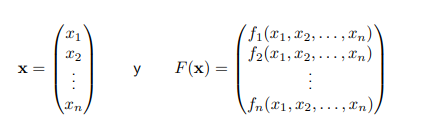

Como parámetros, su algoritmo debe recibir la función `f`, la derivada `Df`,  
el punto inicial de búsqueda `x₀ ∈ ℝⁿ`, así como los criterios de paro `maxIter` y `tol > 0`.  

Para la salida, su función debe devolver la lista de aproximaciones realizadas  
y el valor del punto `x* ∈ ℝⁿ` donde está el cero.


Con su implementacion, resolver el siguiente sistema de ecuaciones con 7 cifras decimales de precision

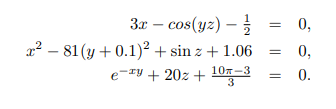

Definimos las importaciones

In [4]:
import autograd as ad
import numpy as np
from autograd import grad, jacobian
import autograd.numpy as anp

Hacemos la implementacion de Newtion multivariable

In [43]:

class NewtonRaphson ():  
  def __init__(self, F, J, x0, tol=1e-6, maxIter=20 ):
    self.F = F
    self.x0 = x0
    self.tol = tol
    self.iteraciones = maxIter
    self.J =J
  

  def evaluate(self):
    error = 100
    aproximaciones = []
    x = anp.array(self.x0)
    i = 0
    while np.any(abs(error) > self.tol) and i < self.iteraciones:
      aproximaciones.append(x.copy())

      Fx = self.F(x)
      Jx = self.J(x)
      delta = np.linalg.solve(Jx, -Fx)
      x_new = x + delta
      if np.linalg.norm(delta, ord=2) < self.tol:
        print(f"Convergió en {i+1} iteraciones")
        return np.array(x_new), aproximaciones
      error = x_new - x
      print("Iteracion: ", i)
      print("Error: ", error)
      print("-----")
      x = x_new
      i = i+1
    raise ValueError("No convergió")


Ahora definimos la funcion y su jacobiano
$$
F(x, y, z) =
\begin{cases}
3x - \cos(yz) - \frac{1}{2} = 0, \\
x^{2} - 81(y + 0.1)^{2} + \sin(z) + 1.06 = 0, \\
e^{-xy} + 20z + \frac{10\pi - 3}{3} = 0.
\end{cases}
$$


In [48]:
def F(vars):
    x, y, z = vars
    return anp.array([
        3*x - anp.cos(y*z) - 0.5,
        x**2 - 81*(y + 0.1)**2 + anp.sin(z) + 1.06,
        anp.exp(-x*y) + 20*z + (10*anp.pi - 3)/3
    ])


J = jacobian(F)

x0 = [1.0, 1.0, 1.0]


nr = NewtonRaphson(F, J, x0, 1e-6, 20)
sol, aprox = nr.evaluate()
print("\nAproximaciones")

i = 0
for ap  in aprox:
    i += 1
    print(f"Iteracion {i} - {ap}")
print("\nSolución:", sol)



Iteracion:  0
Error:  [-0.08031279 -0.53917754 -1.50338764]
-----
Iteracion:  1
Error:  [-0.41868673 -0.27338898 -0.0174816 ]
-----
Iteracion:  2
Error:  [-0.00045755 -0.12628002 -0.00113173]
-----
Iteracion:  3
Error:  [-0.0004385  -0.04953635 -0.00129418]
-----
Iteracion:  4
Error:  [-9.89258977e-05 -1.10114900e-02 -2.87790203e-04]
-----
Iteracion:  5
Error:  [-5.49371608e-06 -6.03789356e-04 -1.57915032e-05]
-----
Iteracion:  6
Error:  [-1.66554476e-08 -1.82635074e-06 -4.77710274e-08]
-----
Convergió en 8 iteraciones

Aproximaciones
Iteracion 1 - [1. 1. 1.]
Iteracion 2 - [ 0.91968721  0.46082246 -0.50338764]
Iteracion 3 - [ 0.50100049  0.18743348 -0.52086923]
Iteracion 4 - [ 0.50054294  0.06115345 -0.52200096]
Iteracion 5 - [ 0.50010444  0.01161711 -0.52329515]
Iteracion 6 - [ 0.50000551  0.00060562 -0.52358294]
Iteracion 7 - [ 5.00000017e-01  1.82636745e-06 -5.23598728e-01]
Iteracion 8 - [ 5.00000000e-01  1.67105150e-11 -5.23598776e-01]

Solución: [ 5.00000000e-01 -1.65752882e-17 -5

La solucion es 
$$
x \approx 0.5, \quad y \approx -1.66 \times 10^{-17}, \quad z \approx -0.523598776
$$

En fracciones conocidas:

$$
x = \frac{1}{2}, \quad y \approx 0, \quad z \approx -\frac{\pi}{6}
$$
